In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
geo_comment = pd.read_excel ('geo_comment.xlsx')
geo = pd.read_excel ('geo.xlsx')

In [4]:
geo.head(20)

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1
5,5,37.558526,55.728758,-1
6,6,37.566431,55.731794,-1
7,7,37.558957,55.723399,-1
8,8,37.558957,55.723399,-1
9,9,37.565767,55.734567,-1


# 1. визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

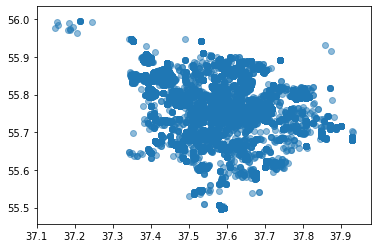

In [5]:
plt.scatter(geo['x'], geo['y'], alpha=0.5)

In [4]:
#Нормализируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
geo_features = geo[['x', 'y']]

In [6]:
geo_scaled = scaler.fit_transform(geo_features)

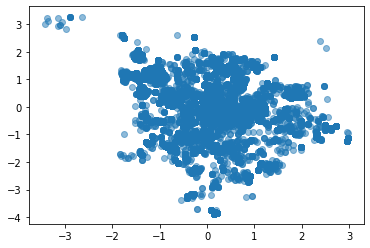

In [9]:
plt.scatter(geo_scaled[:, 0], geo_scaled[:, 1], alpha=0.5)

## K-Means

In [10]:
from sklearn.cluster import KMeans

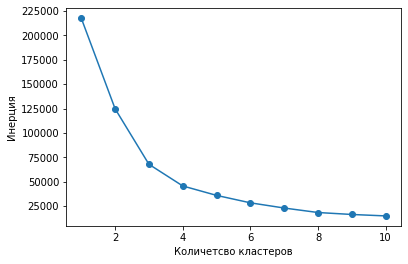

In [11]:
# Определим оптимальное количество кластеров

num_clusters = range(1,11)
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(geo_scaled)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Количетсво кластеров')
plt.ylabel('Инерция')
plt.show()


In [12]:
# Возьмем 4 кластера
kmeans = KMeans(n_clusters=4)

In [13]:
kmeans.fit(geo_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
labels = kmeans.predict(geo_scaled)

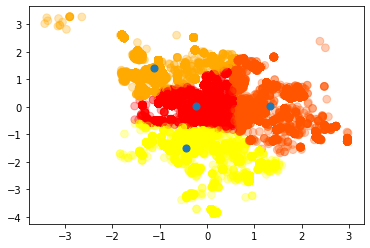

In [16]:
plt.scatter(geo_scaled[:, 0], geo_scaled[:, 1], c=labels, cmap='autumn', s=60, alpha = 0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

## DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN()

In [49]:
dbscan.fit(geo_scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [50]:
dbscan_labels = dbscan.labels_

Text(0.5, 1.0, 'DBSCAN при eps=0.5')

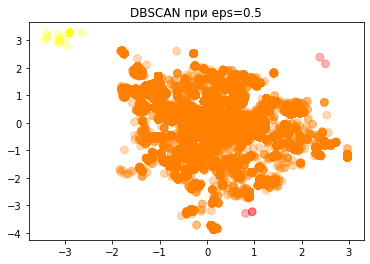

In [51]:
plt.scatter(geo_scaled[:, 0], geo_scaled[:, 1], c=dbscan_labels, cmap='autumn', s=60, alpha = 0.3)
plt.title('DBSCAN при eps=0.5')

In [52]:
# Попробуем поменять параметр eps на 0.1
dbscan = DBSCAN(eps=0.1)

In [53]:
dbscan.fit(geo_scaled)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [54]:
dbscan_labels = dbscan.labels_

Text(0.5, 1.0, 'DBSCAN при eps=0.1')

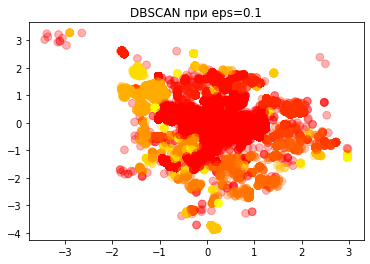

In [55]:
plt.scatter(geo_scaled[:, 0], geo_scaled[:, 1], c=dbscan_labels, cmap='autumn', s=60, alpha = 0.3)
plt.title('DBSCAN при eps=0.1')

## AgglomerativeClustering

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

In [16]:
#Посколько мой компьютер не может построить эту модель для всего объема данных, попробуем сделать рассчет для 30% данных
X_train, X_test = train_test_split(geo_scaled, train_size=0.3)

In [10]:
len(geo_scaled)

108806

In [17]:
len(X_train)

32641

In [11]:
ac = AgglomerativeClustering(n_clusters=4)

In [18]:
ac.fit(X_train)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [19]:
ac_labels = ac.labels_

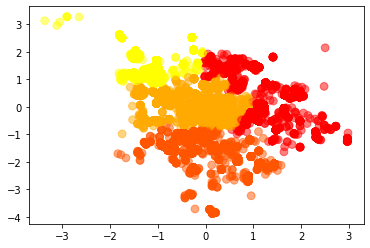

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=ac_labels, cmap='autumn', s=60, alpha = 0.5)

## AffinityPropagation

In [26]:
from sklearn.cluster import AffinityPropagation

In [27]:
ap = AffinityPropagation()

In [28]:
#Посколько мой компьютер не может построить эту модель для всего объема данных, попробуем сделать рассчет для 10% данных
X_train, X_test = train_test_split(geo_scaled, train_size=0.1)

In [33]:
# Модель так и не построилась. 

ap.fit(X_train)

/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [31]:
ap_labels = ap.labels_

In [ ]:
plt.scatter(geo_scaled[:, 0], geo_scaled[:, 1], c=ap_labels, cmap='autumn', s=60, alpha = 0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

# 2. Аналогично исследовать скопления голосов за и против отдельно

In [36]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
geo_features = geo[['x', 'y', 'comment_class']]

In [27]:
geo_scaled = scaler.fit_transform(geo_features)

## K-Means

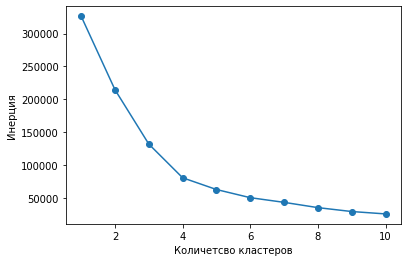

In [30]:
# Определим оптимальное количество кластеров

num_clusters = range(1,11)
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(geo_scaled)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Количетсво кластеров')
plt.ylabel('Инерция')
plt.show()


In [31]:
# Возьмем 4 кластера
kmeans = KMeans(n_clusters=4)

In [32]:
kmeans.fit(geo_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
labels = kmeans.predict(geo_scaled)

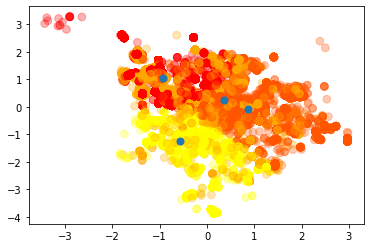

In [34]:
plt.scatter(geo_scaled[:, 0], geo_scaled[:, 1], c=labels, cmap='autumn', s=60, alpha = 0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

In [35]:
adjusted_rand_score(y, y_pred)


array([1, 1, 1, ..., 2, 0, 0], dtype=int32)

In [ ]:
silhouette_score(X, y_pred)


## DBSCAN


In [37]:
dbscan = DBSCAN()

In [38]:
dbscan.fit(geo_scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [39]:
dbscan_labels = dbscan.labels_

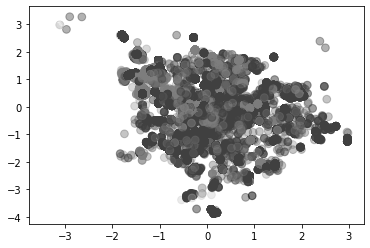

In [46]:
plt.scatter(geo_scaled[:, 0], geo_scaled[:, 1], c=dbscan_labels, cmap='gray', s=60, alpha = 0.3)

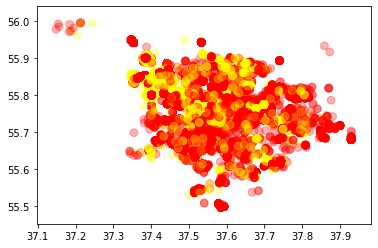

In [45]:
# Для сравнения так выглядят данные изначально
plt.scatter(geo['x'], geo['y'], c=geo['comment_class'], cmap='autumn', s=60, alpha = 0.3)